In [1]:
import pandas as pd
pd.set_option('max_colwidth', 80)

from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns

def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d


def clean_twitter(s):
    s = sub(r'@\w+', "", s)
    s = sub(r'https\S+', "", s)
    s = sub("^RT", "", s)
    s = sub("\n", "", s)
    """ Cleans Twitter specific issues
    Should probably clean out mentions, URLs, and RT's.
    """

    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable!

    # BONUS: Try using the library "spacy" to 
    # do further processing, such as lemmatizing
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    # or adding the part of speech or dependency code to the word 

    return s


In [2]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

In [3]:
X.map(clean_twitter)

0        : Here's CNN on Sharia law. You can be stoned or have your hands cut off, b...
1        : LOOK obama Clinton cronies ILLEGALLY arm &amp; train muslims terrorist in...
2        : #ThrowbackThursday #BenGarrison #cartoon from 2013 #Obama gets crowned #W...
3                         : Say 'Islam is peace', or else!  #trump #maga #isis #tcot   
4                                           :  All aboard the Trump Train! #ChooChoo 🚂 
5        : FLASHBACK &gt;&gt; Judicial Watch Releases Huma Abedin Deposition Testimony 
6        : Following FBI presser,  says “the system is rigged!”  &amp;  weigh in #Fo...
7                                      : Trump: "We're Running Against a Rigged Press" 
8        : Literally 98% of Hillary supporters I see online are astroturfed spammers...
9                                                                       :   Islam. ... 
10       : .PSYCHO - MOTHERHillary at her most EVIL.#MAGA  #BasketOfDeplorables #Nev...
11       : The unthinkable has h

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer # check out documentation, do they include stopwords, how the ideas we talked about are implemented

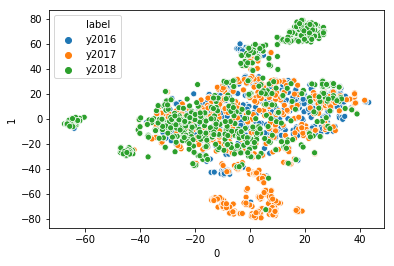

In [5]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

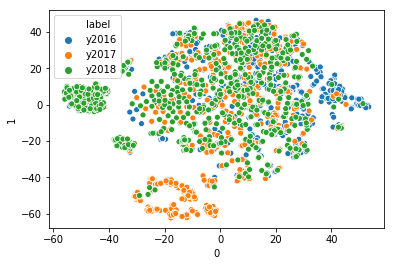

In [6]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

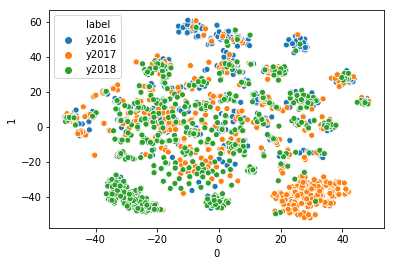

In [10]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way? 

vectorizer = TfidfVectorizer(preprocessor = clean_twitter, stop_words = "english")
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)